In [8]:
pip install pandas

In [9]:
pip install update

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install update

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [13]:
# 라이브러리 import
import pandas as pd
from prophet import Prophet

In [14]:
# 데이터 준비
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [15]:
# 모델(m)에 데이터 학습 시키기 
m = Prophet()
m.fit(df)

18:42:35 - cmdstanpy - INFO - Chain [1] start processing
18:42:35 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# 예측 기간 추가 
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206964,7.446599,8.932716
3266,2017-01-16,8.531958,7.812936,9.238392
3267,2017-01-17,8.319376,7.619440,9.079437
3268,2017-01-18,8.151991,7.402861,8.831629
3269,2017-01-19,8.163908,7.461723,8.887564


c:\Users\20061\OneDrive\바탕 화면\test\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\20061\OneDrive\바탕 화면\test\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


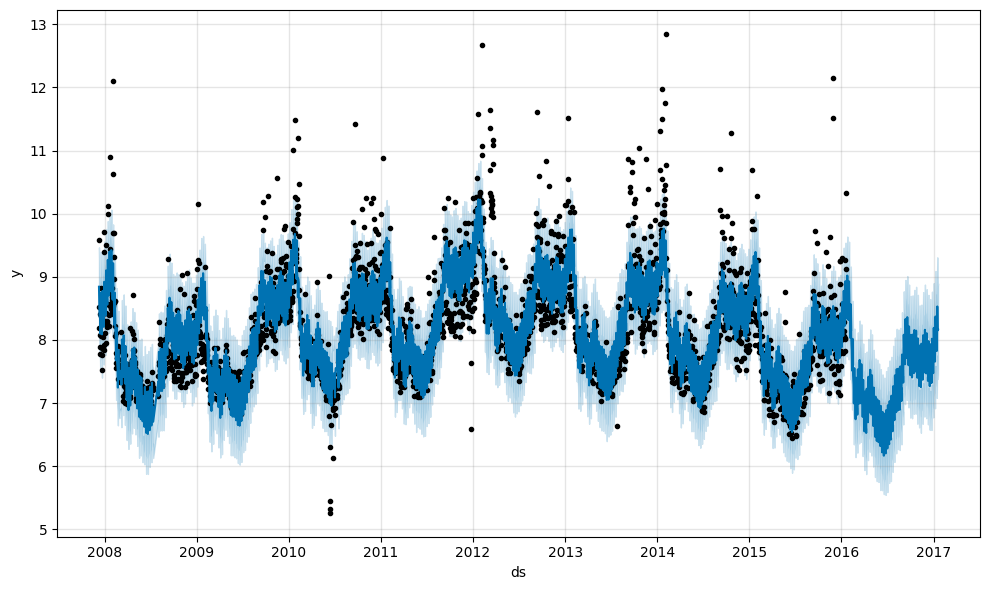

In [17]:
fig1 = m.plot(forecast)

c:\Users\20061\OneDrive\바탕 화면\model-test\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\20061\OneDrive\바탕 화면\model-test\.venv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\20061\OneDrive\바탕 화면\model-test\.venv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime o

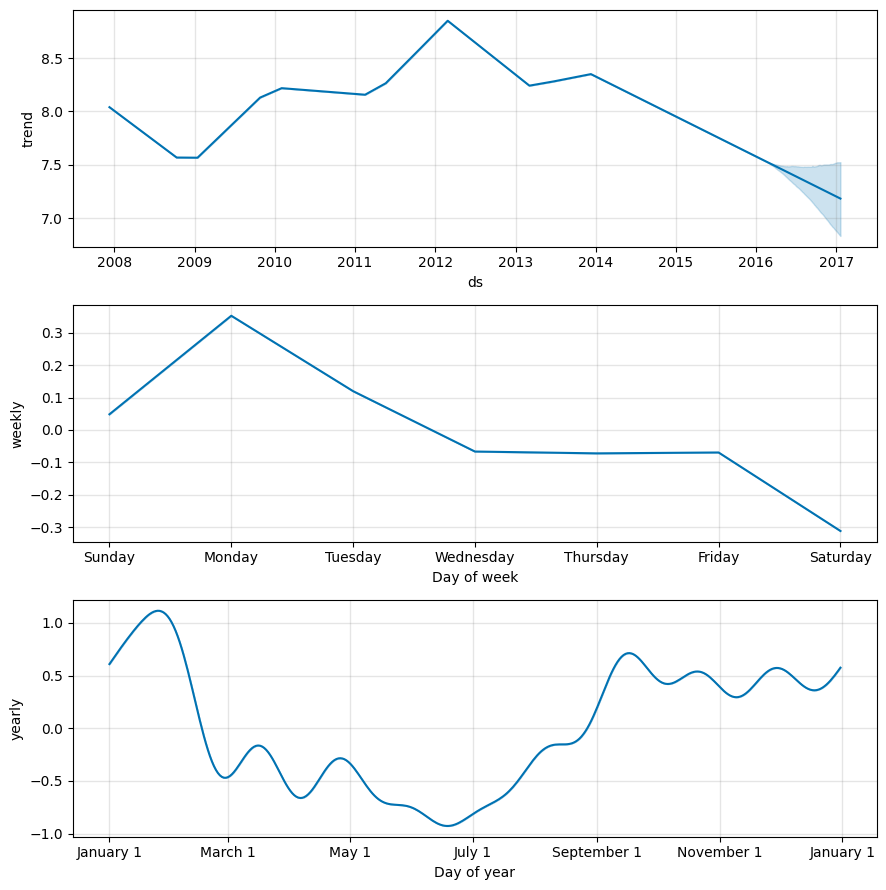

In [18]:
fig2 = m.plot_components(forecast)